# Linear Regression

## In this exercise, we try to build a predictive model to predict salary of a person based on experience.

## The source of dataset is from Kaggle [Salary_Data.csv](https://www.kaggle.com/vihansp/salary-data#)

In [1]:
# import libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
# Reading csv file
df = pd.read_csv('files/Salary_Data.csv')

In [3]:
# checking first few rows
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
# checking dataframe shape
print(df.shape)

(30, 2)


In [5]:
# checking any null values in dataframe
print(df.isnull().values.any())

False


In [6]:
# checking basic statistics of dataframe
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [6]:
# Check any correlation
print(df.corr())

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


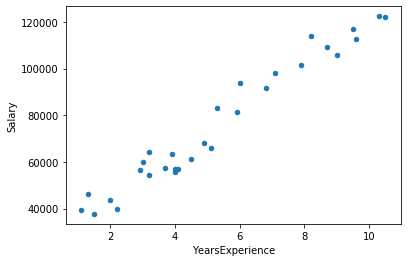

In [7]:
# Scatter plot to visualise any relationship between two variables
df.plot.scatter(x='YearsExperience', y='Salary')

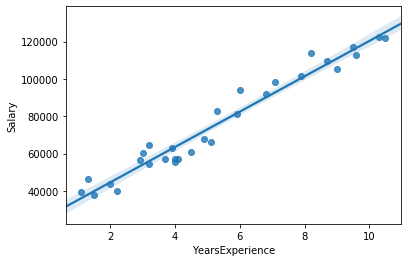

In [9]:
# Regression plot using Seaborn library
sns.regplot('YearsExperience', 'Salary', data=df)

In [9]:
# Split data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=142)

In [10]:
# checking dimensions of the split data
print("train shape: ", train.shape)
print("test shape: ", test.shape)

train shape:  (24, 2)
test shape:  (6, 2)


In [11]:
X_train = train.drop(['Salary'], axis=1)
y_train = train["Salary"]
X_test = test.drop(['Salary'], axis=1)
y_test = test["Salary"]
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (24, 1)
y_train shape:  (24,)
X_test shape:  (6, 1)
y_test shape:  (6,)


In [12]:
# Building model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# checking coefficients and intercept
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [9432.07555865]
Intercept:  25193.3808357159


In [14]:
# predicting on test set
y_pred = lr.predict(X_test)
y_pred

array([ 61978.47551445,  89331.49463453,  60092.06040272, 102536.40041664,
       122343.7590898 ,  37455.07906196])

In [15]:
# Evaluation metrics
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("r2-squared: ", r2_score(y_test, y_pred))

MSE:  36576323.80268189
RMSE:  6047.836290995474
MAE:  4436.97528089183
r2-squared:  0.9559923177407321


In [16]:
# Evaluation metrics on train set
y_pred_train = lr.predict(X_train)
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("r2-squared: ", r2_score(y_train, y_pred_train))


MSE:  30549520.27221958
RMSE:  5527.162045048035
MAE:  4686.252662751111
r2-squared:  0.9555611135896724
